In [1]:
import numpy as np
import pandas as pd
%load_ext rpy2.ipython

D:\Lingyi\Mysoftware\Anaconda3\envs\pytorch\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%R 
# load LMER libraries
library(lme4)
library(lmerTest)

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: 'lmerTest'


R[write to console]: The following object is masked from 'package:lme4':

    lmer


R[write to console]: The following object is masked from 'package:stats':

    step




In [3]:
from pymer4.models import Lmer

In [4]:
data= pd.read_csv("new_pullreq.csv")
data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,3347933,30544060,Kronos-Integration,kronos-service-consul,1,9,9.0,1,0,0,...,0,0,0,0,2537.0,0,0.696970,0,9,0
3347933,3347934,1142,saltstack,salt,0,1165,NaN,1,10,0,...,0,1,0,0,42.0,0,0.056849,0,1165,0
3347934,3347935,31499094,mjmlio,mjml,1,8834,8834.0,2,6,0,...,0,8,0,0,597.0,0,0.002041,0,8834,0
3347935,3347936,55317,zotonic,zotonic,0,703,NaN,7,15,0,...,0,0,0,0,10.0,0,0.000732,0,703,0


In [5]:
#display characters
i=0
for col in data.columns:
    print(i,col)
    i+=1

0 id
1 project_id
2 ownername
3 reponame
4 merged_or_not
5 lifetime_minutes
6 mergetime_minutes
7 num_commits
8 src_churn
9 test_churn
10 files_added
11 files_deleted
12 files_modified
13 files_changed
14 src_files
15 doc_files
16 other_files
17 num_commit_comments
18 num_issue_comments
19 num_comments
20 num_participants
21 sloc
22 team_size
23 perc_external_contribs
24 commits_on_files_touched
25 test_lines_per_kloc
26 test_cases_per_kloc
27 asserts_per_kloc
28 watchers
29 prev_pullreqs
30 requester_succ_rate
31 followers
32 churn_addition
33 churn_deletion
34 pr_comment_num
35 comment_num
36 perc_neg_emotion
37 perc_pos_emotion
38 perc_neu_emotion
39 part_num_issue
40 part_num_commit
41 part_num_pr
42 part_num_code
43 comment_conflict
44 hash_tag
45 at_tag
46 test_inclusion
47 description_length
48 bug_fix
49 ci_exists
50 ci_latency
51 ci_build_num
52 ci_test_passed
53 ci_failed_perc
54 ci_first_build_status
55 ci_last_build_status
56 language
57 fork_num
58 project_age
59 open_issu

In [6]:
data[['comment_num']]

,comment_num
0,1
1,2
2,0
3,0
4,1
...,...
3347932,0
3347933,3
3347934,15
3347935,0


In [7]:
project_id = data[['project_id']]
#object
merged_or_not = data[['merged_or_not']]

#size of change
churn_addition = data[['churn_addition']]
churn_deletion = data[['churn_deletion']]

#Complexity
description_length = data[['description_length']]

#nature of pull request
bug_fix = data[['bug_fix']]

#test inclusion
test_inclusion = data[['test_inclusion']]

#reference of a contributor,issue or pr
hash_tag = data[['hash_tag']]
at_tag = data[['at_tag']]

#Conflict
comment_conflict = data[['comment_conflict']]

#Hotness or Relevance
pr_comment_num = data[['pr_comment_num']]
part_num_issue = data[['part_num_issue']]
part_num_commit = data[['part_num_commit']]
part_num_pr = data[['part_num_pr']]
part_num_code = data[['part_num_code']]

#Emotions
comment_num = data[['comment_num']]
perc_neg_emotion = data[['perc_neg_emotion']]
perc_pos_emotion = data[['perc_pos_emotion']]
perc_neu_emotion = data[['perc_neu_emotion']]

#Continuous Integration
ci_exists = data[['ci_exists']]
ci_latency = data[['ci_latency']]
ci_build_num = data[['ci_build_num']]
ci_test_passed = data[['ci_test_passed']]
ci_failed_perc = data[['ci_failed_perc']]
ci_first_build_status = data[['ci_first_build_status']]
ci_last_build_status = data[['ci_last_build_status']]

In [8]:
print(churn_addition)
type(merged_or_not)

         churn_addition
0                     0
1                     0
2                     0
3                   110
4                    60
...                 ...
3347932               0
3347933               9
3347934               6
3347935               3
3347936           13998

[3347937 rows x 1 columns]


pandas.core.frame.DataFrame

In [9]:
# Create dataframe for model
df = data [['project_id','merged_or_not','churn_addition','churn_deletion','description_length','bug_fix','test_inclusion','hash_tag','at_tag','comment_conflict','pr_comment_num','part_num_issue','part_num_commit','part_num_pr','part_num_code','comment_num','perc_neg_emotion','perc_pos_emotion','perc_neu_emotion','ci_exists','ci_latency','ci_build_num','ci_test_passed','ci_failed_perc']]
df

,project_id,merged_or_not,churn_addition,churn_deletion,description_length,bug_fix,test_inclusion,hash_tag,at_tag,comment_conflict,...,part_num_code,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc
0,13708387,1,0,0,4926,NaN,0,1,0,0,...,0,1,0.000000,0.000000,1.000000,1.0,274.0,1.0,1.0,0.0
1,100297899,0,0,0,1312,NaN,0,0,0,0,...,0,2,0.000000,0.000000,0.000000,1.0,79.0,1.0,0.0,1.0
2,93139005,1,0,0,4,NaN,0,0,0,0,...,0,0,0.000000,0.000000,0.000000,1.0,88.0,1.0,1.0,0.0
3,15059440,1,110,3,94,NaN,1,0,1,0,...,0,0,0.000000,0.000000,0.000000,1.0,489.0,1.0,1.0,0.0
4,29684214,1,60,0,49,NaN,1,0,0,0,...,0,1,0.000000,1.000000,0.000000,1.0,261.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,30544060,1,0,0,14,NaN,0,0,0,0,...,0,0,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,NaN
3347933,1142,0,9,1,58,NaN,0,0,1,1,...,0,3,0.000000,0.333333,0.666667,1.0,NaN,NaN,NaN,NaN
3347934,31499094,1,6,0,49,NaN,1,1,1,0,...,0,15,0.142857,0.285714,0.571429,1.0,NaN,NaN,NaN,NaN
3347935,55317,0,3,12,77,NaN,0,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,project_id,merged_or_not,churn_addition,churn_deletion,description_length,bug_fix,test_inclusion,hash_tag,at_tag,comment_conflict,...,part_num_code,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc
count,3.347937e+06,3.347937e+06,3.347937e+06,3.347937e+06,3.347937e+06,23526.000000,3.347937e+06,3.347937e+06,3.347937e+06,3.347937e+06,...,3.347937e+06,3.347937e+06,3.032578e+06,3.032578e+06,3.032578e+06,3.345254e+06,1.547500e+06,1.547500e+06,1.547500e+06,1.547500e+06
mean,3.005081e+07,8.094824e-01,4.909525e+02,3.311015e+02,6.655967e+01,0.615277,1.951378e-01,2.164318e-01,2.053542e-01,1.192466e-02,...,4.112007e-01,3.745709e+00,2.745040e-02,9.287131e-02,3.159639e-01,7.565662e-01,2.467963e+04,3.326571e+00,6.900058e-01,1.949470e-01
std,3.350986e+07,3.927094e-01,9.842485e+03,1.790696e+04,3.145179e+02,0.486540,3.963068e-01,4.118120e-01,4.039603e-01,1.085471e-01,...,9.381667e-01,1.081791e+01,1.138706e-01,2.383181e-01,4.245714e-01,4.291548e-01,1.227932e+06,1.326341e+01,4.624910e-01,3.373634e-01
min,9.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.117160e+08,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.314311e+06,1.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.020000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.767456e+07,1.000000e+00,1.300000e+01,4.000000e+00,2.200000e+01,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.300000e+02,1.000000e+00,1.000000e+00,0.000000e+00
75%,4.580597e+07,1.000000e+00,9.100000e+01,3.100000e+01,5.800000e+01,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,7.777780e-01,1.000000e+00,1.868000e+03,3.000000e+00,1.000000e+00,3.333330e-01
max,1.373162e+08,1.000000e+00,6.390544e+06,1.654167e+07,3.902300e+04,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,9.200000e+01,1.636000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.919340e+08,3.051000e+03,1.000000e+00,1.000000e+00


In [11]:
df.max()


project_id            137316161.0
merged_or_not                 1.0
churn_addition          6390544.0
churn_deletion         16541668.0
description_length        39023.0
bug_fix                       1.0
test_inclusion                1.0
hash_tag                      1.0
at_tag                        1.0
comment_conflict              1.0
pr_comment_num             1599.0
part_num_issue              197.0
part_num_commit              92.0
part_num_pr                  24.0
part_num_code                92.0
comment_num                1636.0
perc_neg_emotion              1.0
perc_pos_emotion              1.0
perc_neu_emotion              1.0
ci_exists                     1.0
ci_latency            191934000.0
ci_build_num               3051.0
ci_test_passed                1.0
ci_failed_perc                1.0
dtype: float64

In [12]:
# %%R
from sklearn.preprocessing import scale
scale(df)

array([[-0.48769001,  0.48513642, -0.04988096, ..., -0.17541276,
         0.67027095, -0.5778548 ],
       [ 2.09631152, -2.06127588, -0.04988096, ..., -0.17541276,
        -1.49193397,  2.38630868],
       [ 1.88267603,  0.48513642, -0.04988096, ..., -0.17541276,
         0.67027095, -0.5778548 ],
       ...,
       [ 0.04321972,  0.48513642, -0.04927136, ...,         nan,
                nan,         nan],
       [-0.8951245 , -2.06127588, -0.04957616, ...,         nan,
                nan,         nan],
       [-0.72785006,  0.48513642,  1.37232108, ..., -0.17541276,
         0.67027095, -0.5778548 ]])

In [13]:
model = Lmer('merged_or_not~churn_addition+churn_deletion+description_length+bug_fix+test_inclusion+hash_tag+at_tag+comment_conflict+pr_comment_num+part_num_issue+part_num_commit+part_num_pr+part_num_code+perc_neg_emotion*comment_num+perc_pos_emotion*comment_num+perc_neu_emotion*comment_num+ci_exists+ci_latency+ci_build_num+ci_test_passed+ci_failed_perc+(1|project_id)',data=df)

In [14]:
display(model.fit())

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: merged_or_not~churn_addition+churn_deletion+description_length+bug_fix+test_inclusion+hash_tag+at_tag+comment_conflict+pr_comment_num+part_num_issue+part_num_commit+part_num_pr+part_num_code+perc_neg_emotion*comment_num+perc_pos_emotion*comment_num+perc_neu_emotion*comment_num+ci_exists+ci_latency+ci_build_num+ci_test_passed+ci_failed_perc+(1|project_id)

Family: gaussian	 Inference: parametric

Number of observations: 3347937	 Groups: {'project_id': 1649.0}

Log-likelihood: -1635.655 	 AIC: 3271.309

Random effects:

                   Name    Var    Std
project_id  (Intercept)  0.011  0.105
Residual                 0.071  0.266

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.022,0.996,1.049,0.013,10204.657,76.600,0.000,***
churn_addition,-0.000,-0.000,-0.000,0.000,11423.862,-2.537,0.011,*
churn_deletion,0.000,0.000,0.000,0.000,11376.023,2.329,0.020,*
description_length,-0.000,-0.000,0.000,0.000,11414.297,-1.129,0.259,
bug_fix,-0.002,-0.013,0.009,0.006,11371.781,-0.344,0.730,
test_inclusion,0.005,-0.007,0.017,0.006,10833.772,0.851,0.395,
hash_tag,0.040,0.028,0.052,0.006,10964.549,6.408,0.000,***
at_tag,-0.032,-0.047,-0.017,0.008,11456.762,-4.235,0.000,***
comment_conflict,-0.041,-0.082,0.000,0.021,11319.930,-1.946,0.052,.
pr_comment_num,0.002,-0.000,0.004,0.001,11251.948,1.845,0.065,.


In [15]:
display(model.anova())

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


,SS,MS,NumDF,DenomDF,F-stat,P-val,Sig
0,0.454135,0.454135,1.0,11423.862134,6.433990,1.120888e-02,*
1,0.382766,0.382766,1.0,11376.022745,5.422861,1.989219e-02,*
2,0.089997,0.089997,1.0,11414.297424,1.275033,2.588484e-01,
3,0.008377,0.008377,1.0,11371.780950,0.118678,7.304789e-01,
4,0.051081,0.051081,1.0,10833.771967,0.723699,3.949522e-01,
5,2.898187,2.898187,1.0,10964.549294,41.060272,1.536602e-10,***
6,1.265757,1.265757,1.0,11456.762440,17.932703,2.306416e-05,***
7,0.267389,0.267389,1.0,11319.929775,3.788247,5.163838e-02,.
8,0.240279,0.240279,1.0,11251.948340,3.404168,6.505816e-02,.
9,5.481651,5.481651,1.0,11450.217286,77.661675,1.398904e-18,***


<AxesSubplot:xlabel='Estimate'>

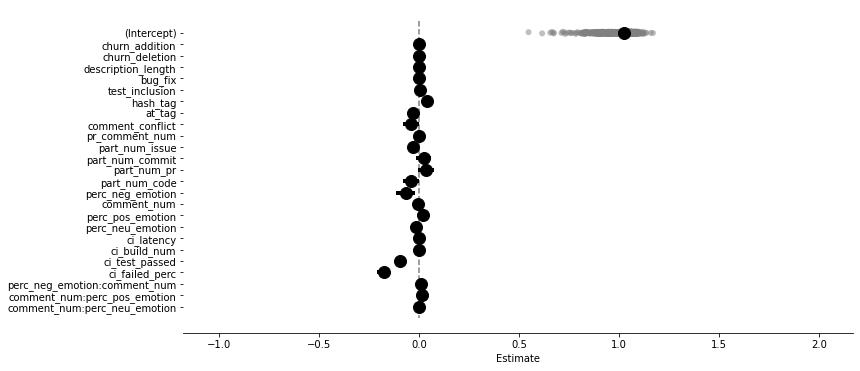

In [16]:
model.plot_summary()